# Add the theory here

In [1]:
import scipy.io as spio
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt


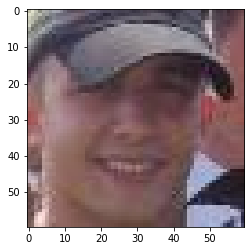

In [2]:
DATA_DIR = 'dataset'
faceNorm = spio.loadmat(os.path.join(DATA_DIR, 'faceNorm.mat')).get('faceNorm')

# Construct the input dataset from the original dataset.

I = 1000
D = 60*60*3
X = np.zeros((I, D))
img = faceNorm[:,:,:,0]

for i in range(I):
    img = faceNorm[:,:,:,i]
    X[i,:] = img[:].reshape(1, D)
    
test_img = plt.imshow(X[0].reshape(60,60,3))


In [3]:
def fit_fa (X, K, iterations):

    I, D = X.shape
    # Initialize mu to the data mean.    
    mu = np.sum(X,axis=0) / I
    # Initialize phi to random values.
    phi = np.random.randn(D,K)
    
    # Initialize sig, by setting its diagonal elements to the
    # variances of the D data dimensions.
    x_minus_mu = X - mu
    sig = np.sum (x_minus_mu ** 2, axis=0) / I
    
    # The main loop.
    iterations_count = 0
    while True:
        # Expectation step.
        inv_sig = np.diag(1 / sig)
        phi_transpose_times_sig_inv = phi.T @ inv_sig
        temp = np.linalg.inv(phi_transpose_times_sig_inv @ phi + np.eye(K))
        E_hi = temp @ phi_transpose_times_sig_inv @ x_minus_mu.T
        E_hi_hitr = np.zeros((I, K, K))
        for i in range(I):
            e = E_hi[:,i][:, np.newaxis]
            E_hi_hitr[i] = temp + e @ e.T
        # Maximization step.
        # Update phi.
        phi_1 = np.zeros((D,K))
        for i in range(I):
            phi_1 = phi_1 + (x_minus_mu[i,:][:, np.newaxis] @ E_hi[:,i][np.newaxis, :])
        phi_2 = np.zeros((K,K))
        for i in range(I):
            phi_2 = phi_2 + E_hi_hitr[i]
        phi_2 = np.linalg.inv(phi_2)
        phi = phi_1 @ phi_2
        
        # Update sig.        
        sig_diag = np.zeros((D,1))
        for i in range(I):
            xm = x_minus_mu[i,:][:, np.newaxis]
            sig_1 = xm * xm;
            sig_2 = (phi @ E_hi[:,i][:, np.newaxis]) * xm;
            sig_diag = sig_diag + sig_1 - sig_2;
        sig = (sig_diag / I)[:, 0]
        
        iterations_count = iterations_count + 1;        
        print('iteration {}'.format(iterations_count));
        if iterations_count == iterations:
            break;
    return mu, phi, sig


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10


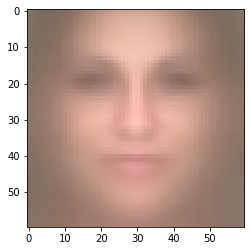

In [4]:
# Fit a factor analyzer.
K = 10;
iterations = 10;
mu, phi, sig = fit_fa (X, K, iterations);

# Plot mu.
mu = mu / np.max(mu)
mu_mat = mu.reshape(60,60,3)
plt.imshow(mu.reshape(60,60,3))



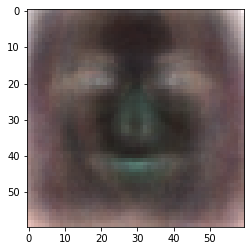

In [5]:

# Plot sig.
sig = sig / np.max(sig);
sig_mat = sig.reshape(60,60,3)
plt.imshow(sig_mat.reshape(60,60,3))


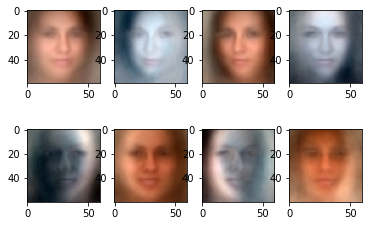

In [6]:
# Example similar to (Figure 7.22) in Dr. Prince's book.
rate = 0.001;
mu_phi_lin_combinations = np.zeros((8,D))
for i in range(4):
    phi_ = phi[:,i]
    
    # Go away from mu in positive phi_ direction.
    v = mu
    while True:
        new = v + rate * phi_
        if np.sum(new<0) == 0:
            v=new;
        else:
            break;        
    mu_phi_lin_combinations[i,:] = v;
    
    # Go away from mu in negative phi_ direction.
    v = mu;
    while True:
        new = v - rate * phi_;
        if np.sum(new<0)==0:
            v=new;
        else:
            break;        
    mu_phi_lin_combinations[4+i,:] = v;

# Reshape and normalize.
mu_phi_lin_combinations_mat = np.zeros((8, 60, 60, 3))
for i in range(8):
    mp = mu_phi_lin_combinations[i,:];
    mp = mp / np.max(mp);
    mp = mp.reshape(60,60,3);    
    mu_phi_lin_combinations_mat[i] = mp;

# Plot the linear combinations between mu and the phi column vectors.

fig, (axs) = plt.subplots(2,4)

for i in range(2):
    for j in range(4):
        axs[i][j].imshow(mu_phi_lin_combinations_mat[i*4+j%4])